In [67]:
import GravityMachineTrack
import imp
import msdanalyzer
import pandas as pd
import numpy as np
import os
imp.reload(GravityMachineTrack)
imp.reload(msdanalyzer)

import matplotlib.pyplot as plt
%matplotlib notebook
    
    #--------------------------------------------------------------------------
    # Dendraster
    #--------------------------------------------------------------------------
#    dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_11/Dendraster_starved_11Days_nofood'
#    TrackNames = {0:['Dendraster1',87,417], 1:['Dendraster2',0,0], 2:['Dendraster3',0,0]}     
        
    
#    dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_11/Dendraster_starved_11Days_withfood'
#    TrackNames = {0:['Dendraster1',87,417], 1:['Dendraster2',0,0], 0:['Dendraster3',0,0]}     

#    dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_11/Dendraster_well_fed_11Days_nofood'
#    TrackNames = {0:['Dendraster1',0,600], 1:['Dendraster2',0,200], 2:['Dendraster3',0,0]}     

    #--------------------------------------------------------------------------
    # Sea cucumber
    #--------------------------------------------------------------------------
#    dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_07/SeaCucumber'
    
#    TrackNames = {0:['seacucmber4_auto_verylong_goodtrack', 0,0], 1:['seacucmber9_Auto', 0,0]}
    
#    TrackNames = {0:['seacucmber4_auto_verylong_goodtrack', 0,0]}
    
    
    #--------------------------------------------------------------------------
    # Sea Urchin
    #--------------------------------------------------------------------------
#    dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_06/SeaUrchin'

#    TrackNames = {0: ['SeaUrchin5',0,0],1: ['SeaUrchin7',0,500],2: ['SeaUrchin8',0,0]}

    #--------------------------------------------------------------------------
    # Acorn Worm
    #--------------------------------------------------------------------------
#    dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_06/AcornWorm_Experiment2_nolight'
#    TrackNames = {0: ['AcornWorm2',0,0],1: ['AcornWorm3',0,0],2: ['AcornWorm4',0,0],3: ['AcornWorm7',0,0]}
#    --------------------------------------------------------------------------
    # Brittle Star
    #--------------------------------------------------------------------------
#    dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/BrittleStar'
    
#    TrackNames = {0:['BrittleStar1',0,0],1:['BrittleStar9_Long_Good_Ytracking',0,0],2:['BrittleStar10_Ytracking_Good',0,0],3:['BrittleStar12_Ytracking_Good',0,0]}
    #--------------------------------------------------------------------------
    # Snail
    #--------------------------------------------------------------------------
#    dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_13/Snail'
    
#    TrackNames = {0:['snail1',0,575],1:['snail2',0,0],2:['snail4',0,0],3:['snail6',0,0],4:['snail8',0,0],5:['snail10',0,0],6:['snail13',0,0]}
    #--------------------------------------------------------------------------
    # Starfish
    #--------------------------------------------------------------------------
#    dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Starfish'
#    TrackNames = {0:['StarFish1', 0,162],1:['StarFish6', 0,600],2:['StarFish7', 60,0],3:['StarFish9', 0,290]}

    
    # Polychaete
    
#     dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Polychaete_4D'
#     TrackNames = {0:['Polychaete1',0,112],1:['Polychaete2',0,113], 2:['Polychaete3',0,37], 3:['Polychaete4',0,55], 4:['Polychaete6',0,113]}

    
    
# #    dataFolder = '/Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_14/Noctiluca'
# #    
# #    TrackNames = {0:['Noctilica6',50,0],1:['Noctilica7',0,1000]}
# #    
#     TrackFile = 'track_mod.csv'
    
#     *rest,orgName = os.path.split(dataFolder)
#     saveFolder = '/Users/deepak/Dropbox/GravityMachine/GravityMachineManuscript/EnsembleTrackStatistics'
    
    
analysis_file = '/Users/deepak/Dropbox/GravityMachine/GravityMachineAnalysis_Scripts/AnalyzeTracks.csv'

analysis_df = pd.read_csv(analysis_file)


pairwise_conditions = [(x,y) for x in analysis_df['Organism'] for y in analysis_df['Condition']]


# Create unique pairs between the Organism and Condition columns
used = set()
unique_conditions = [x for x in pairwise_conditions if x not in used and (used.add(x) or True)]
print(50*'-')
print('Unique condition : {}'.format(unique_conditions))
print(50*'-')

ensemble_tracks = []
TrackArray = []

nUniqueConditions = len(unique_conditions)

# Assemble the list of 
for ii in range(nUniqueConditions):
    
    curr_Organism = unique_conditions[ii][0]
    curr_Condition = unique_conditions[ii][1]
    
    bool_Org = analysis_df['Organism'] == curr_Organism
    bool_Cond = analysis_df['Condition'] == curr_Condition
   
    tracks_sameCondition = analysis_df[bool_Org & bool_Cond]
    
    nTracksSameCondition = len(tracks_sameCondition)
    
    for jj in range(nTracksSameCondition):
        
        Track_df = tracks_sameCondition.iloc[jj]
        
        print(Track_df)
        full_path = os.path.join(Track_df['rootFolder'],Track_df['trackFolder'], Track_df['trackFile'])
        
        track = GravityMachineTrack.gravMachineTrack(trackFile = full_path , organism = Track_df['Organism'], condition = Track_df['Condition'], Tmin = Track_df['Tmin'], Tmax = Track_df['Tmax'])

        TrackArray.append(track)
    
    
    

    
    
# TrackArray = []

# for ii, currFolder in TrackNames.items():
#     path = os.path.join(dataFolder, TrackNames[ii][0])
    
#     TrackArray.append(Track.GravMachineTrack(path, TrackFile, TrackNames[ii][1],TrackNames[ii][2]))



msd1 = msdanalyzer.msdanalyzer(Tracks = TrackArray)


# #    msd1 = msdanalyzer(testFlag=0)

msd1.computeMSD()



--------------------------------------------------
Unique condition : [('Polychaete', 'Day')]
--------------------------------------------------
Organism                                              Polychaete
Condition                                                    Day
rootFolder     /Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_Go...
trackFolder                                          Polychaete1
trackFile                                          track_mod.csv
Tmin                                                           0
Tmax                                                         112
Name: 0, dtype: object
Opening dataset ...
Path : /Volumes/GRAVMACH1/HopkinsEmbroyologyCourse_GoodData/2018_06_12/Polychaete_4D/Polychaete1
images
PIVres
Polych
['Time', 'Xobjet', 'Yobjet', 'Zobjet', 'ThetaWheel', 'ZobjWheel', 'Manual Tracking', 'Image name', 'Focus Measure', 'Liquid Lens Phase', 'Y FM maximum', 'LEDPanel color R', 'LEDPanel color G', 'LEDPanel color B']
0
7754
Pixels per mm: 314.

/Users/deepak/Dropbox/GravityMachine/GravityMachineAnalysis_Scripts/DataAnalysisScripts/msdanalyzer.py:308: RuntimeWarning: Mean of empty slice
  
/Users/deepak/Dropbox/GravityMachine/GravityMachineAnalysis_Scripts/DataAnalysisScripts/msdanalyzer.py:310: RuntimeWarning: Mean of empty slice
  


<IPython.core.display.Javascript object>


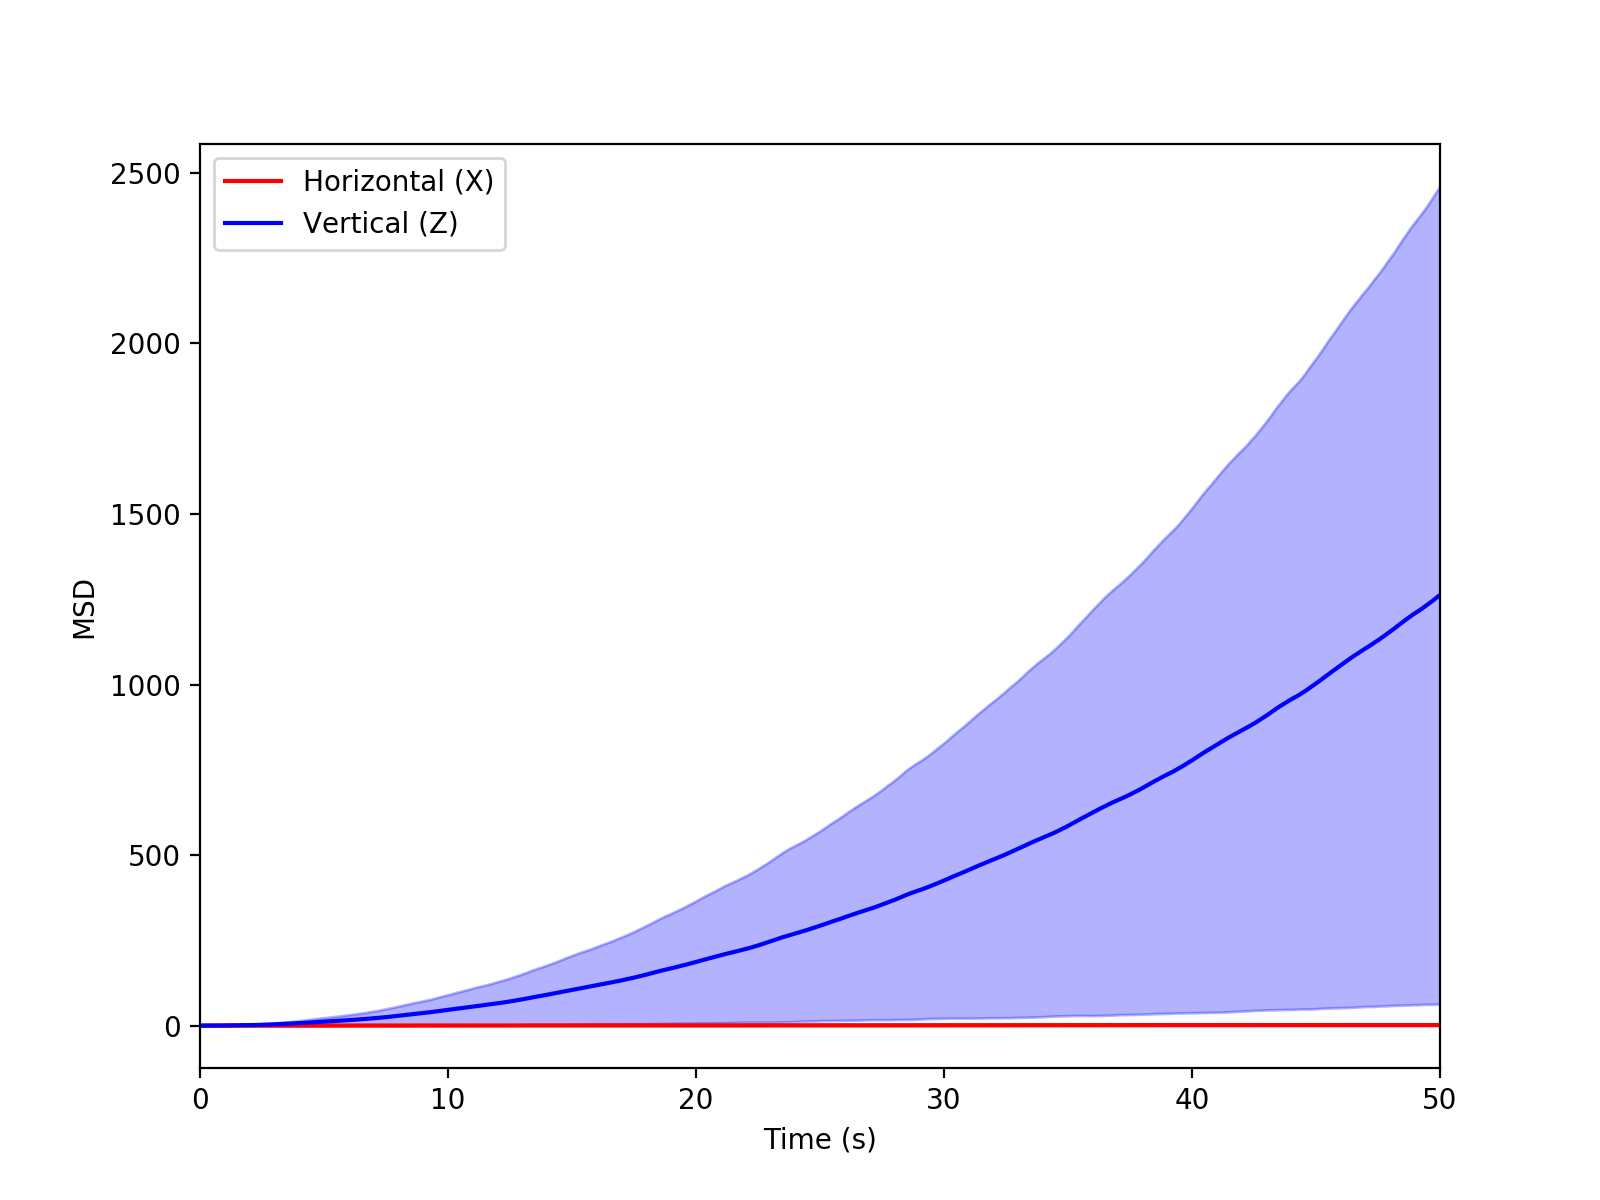

<IPython.core.display.Javascript object>


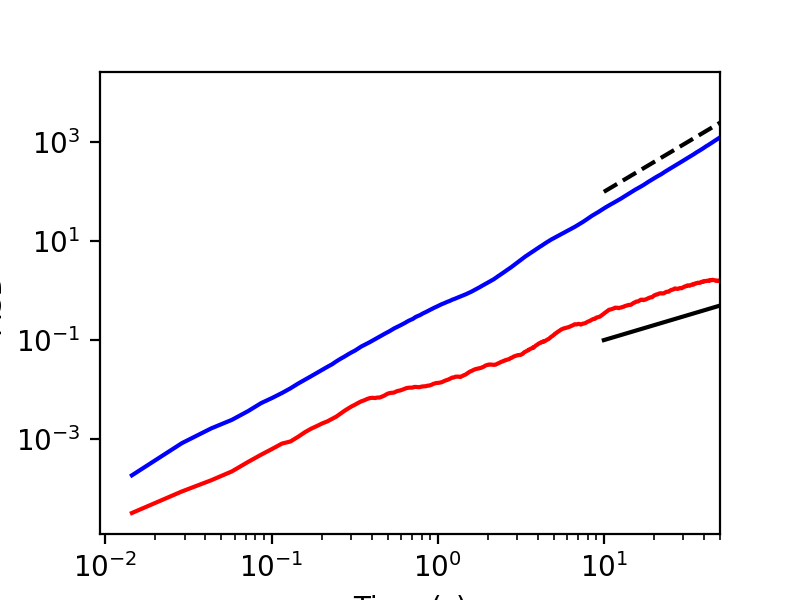

/Users/deepak/Dropbox/GravityMachine/GravityMachineAnalysis_Scripts/DataAnalysisScripts/msdanalyzer.py:377: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  


In [68]:
# Plot the MSD
msd1.plotMSD(figname = 1)